## <div align="center"> IS411 Data Modeling </div>
## <div align="center"> FINAL PROJECT</div>
#### <div align="center"> By Group 5 </div>
---
- Ray Anthony Pranoto (000000666555)
- Jovanka Suryajaya (00000069834)
- Reva Fakhrana Athira (00000068621)
- Fiena Gunawan (00000069579)
- Fayed Abdul Hakim (00000068732)


#### Import Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [2]:
# Load Data
df = pd.read_csv('south-korean-pollution-data.csv')
df.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,Lat,Long,City,District,Country
0,0,2022/2/1,112,31,35,2,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
1,1,2022/2/2,92,21,35,2,1,0,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2,2,2022/2/3,60,20,35,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
3,3,2022/2/4,51,27,33,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
4,4,2022/2/5,57,24,27,2,1,5,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea


In [3]:
# Load Data
df1 = pd.read_csv('south-korean-pollution-data.csv')

In [4]:
df['District'].value_counts()

Seoul           5771
Gyeonggi        5041
Chungnam        4215
Gangwon         3473
Paju-Si         2888
Seo-Gu          2880
Nam-Gu          2865
Chuncheon-Si    2816
Gyeongbuk       2275
Jeonnam         1071
Jeonbuk          625
Chungbuk         610
Name: District, dtype: int64

In [5]:
df.shape

(34530, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34530 entries, 0 to 34529
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  34530 non-null  int64  
 1   date        34530 non-null  object 
 2   pm25        34530 non-null  int64  
 3   pm10        34530 non-null  int64  
 4   o3          34530 non-null  int64  
 5   no2         34530 non-null  int64  
 6   so2         34530 non-null  int64  
 7   co          34530 non-null  int64  
 8   Lat         34530 non-null  float64
 9   Long        34530 non-null  float64
 10  City        34530 non-null  object 
 11  District    34530 non-null  object 
 12  Country     34530 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 3.4+ MB


In [7]:
df.describe()

,Unnamed: 0,pm25,pm10,o3,no2,so2,co,Lat,Long
count,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000
mean,17264.500000,53.224616,34.757428,34.506371,14.802114,3.553084,4.548422,37.022716,127.247759
std,9968.096734,39.952008,21.046112,17.393329,11.479781,2.963608,2.966530,0.919155,0.613795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.059900,126.138700
25%,8632.250000,20.000000,22.000000,23.000000,6.000000,2.000000,3.000000,36.410900,126.896900
50%,17264.500000,55.000000,32.000000,32.000000,12.000000,3.000000,4.000000,37.132400,127.059200
75%,25896.750000,78.000000,45.000000,43.000000,21.000000,5.000000,6.000000,37.757700,127.716100
max,34529.000000,220.000000,685.000000,152.000000,85.000000,110.000000,281.000000,38.208900,130.821700


## Data Preparation

In [8]:
# Select relevant features (numeric)
features = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
X = df[features]
X.head()

,pm25,pm10,o3,no2,so2,co
0,112,31,35,2,1,4
1,92,21,35,2,1,0
2,60,20,35,1,1,4
3,51,27,33,1,1,4
4,57,24,27,2,1,5


In [9]:
# Check Missing Value
X.isnull().sum()

pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64

There is no null value in the dataset

In [10]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Data Visualization

In [11]:
x = df[features]

<Axes: >

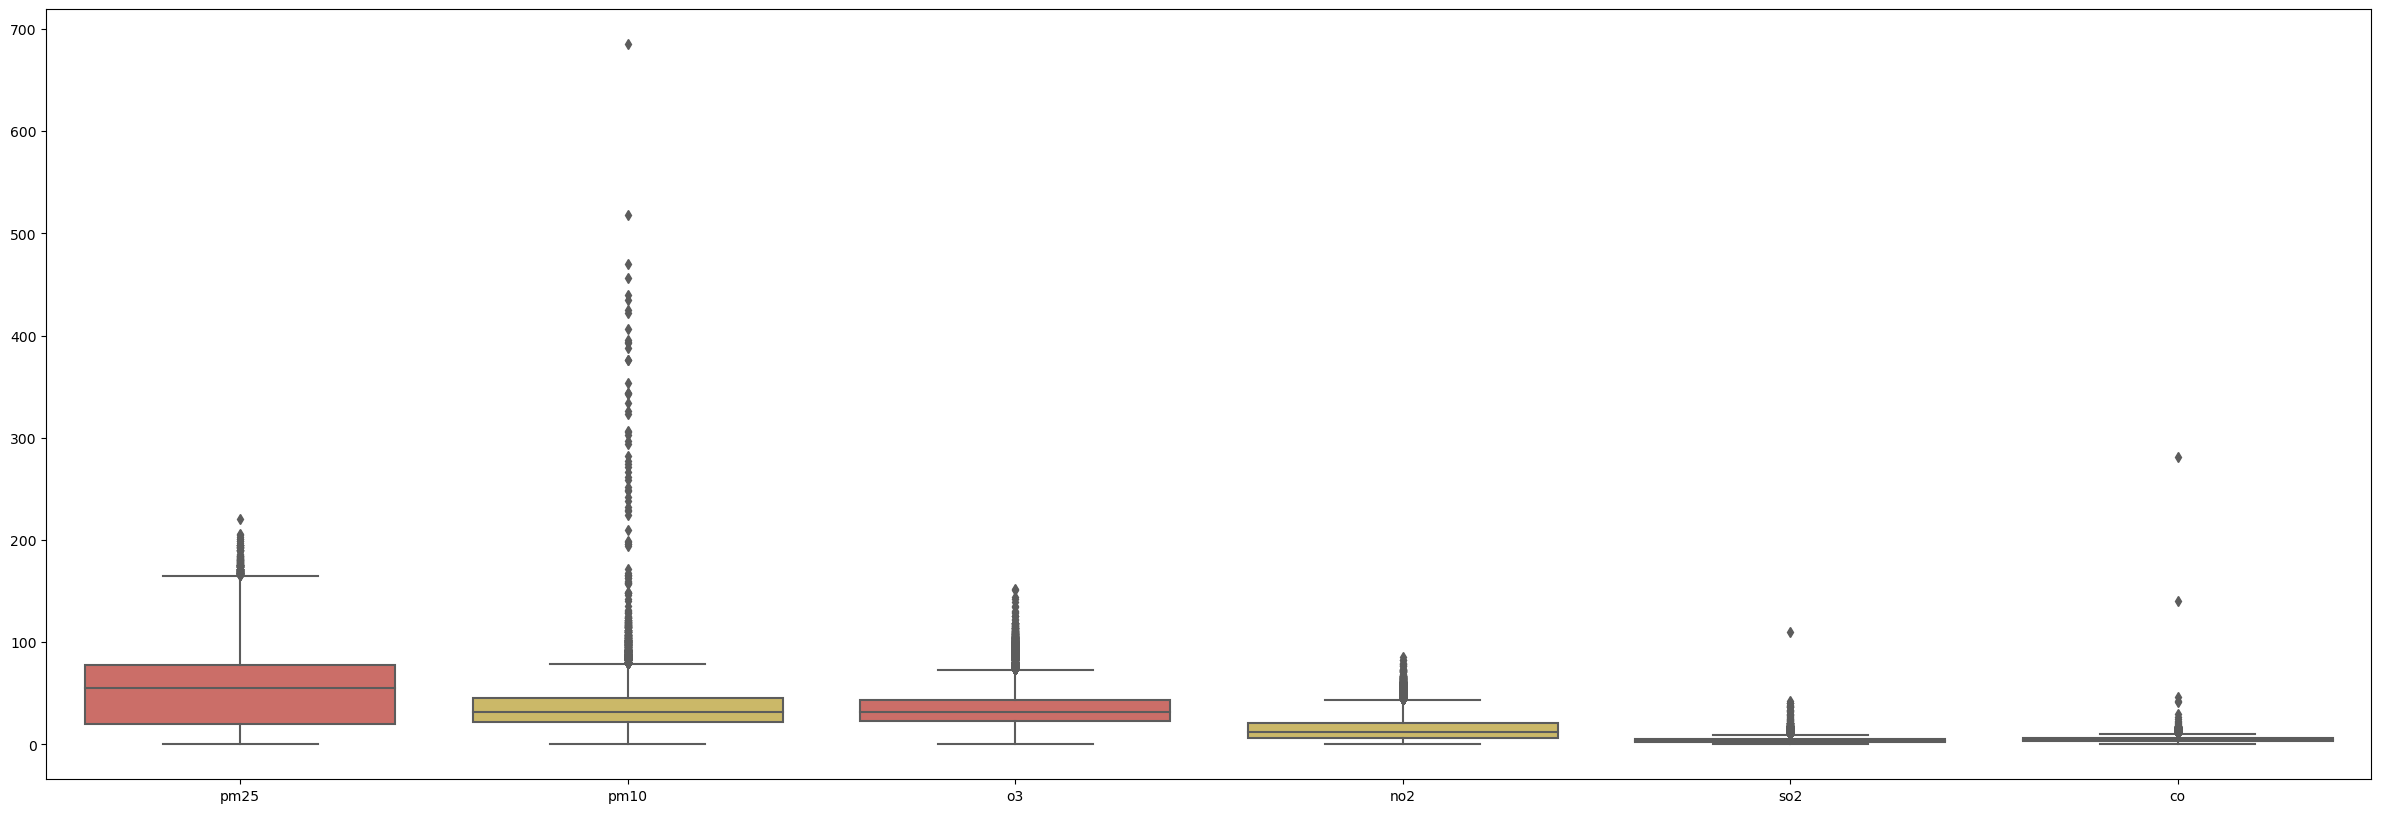

In [12]:
# Visualize bxplot to check outliers
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=x, palette=('#db5f57','#dbc257'))

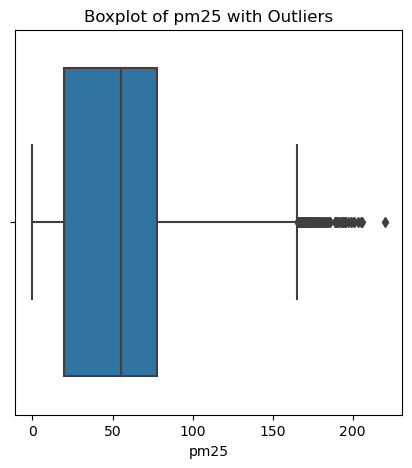

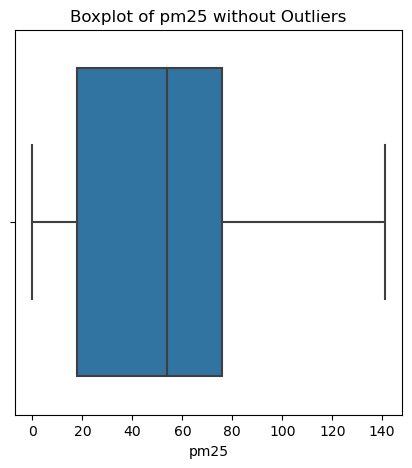

Shape of data without outliers: (33720, 6)


In [13]:
Q1 = x['pm25'].quantile(q=0.25)
Q3 = x['pm25'].quantile(q=0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

# Boxplot before removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['pm25'])
plt.title('Boxplot of pm25 with Outliers')
plt.show()

# Remove outliers pm25
outliers = x[(x['pm25'] < lower_bound) | (x['pm25'] > upper_bound)]
x = x[(x['pm25'] >= lower_bound) & (x['pm25'] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['pm25'])
plt.title('Boxplot of pm25 without Outliers')
plt.show()

print("Shape of data without outliers:", x.shape)

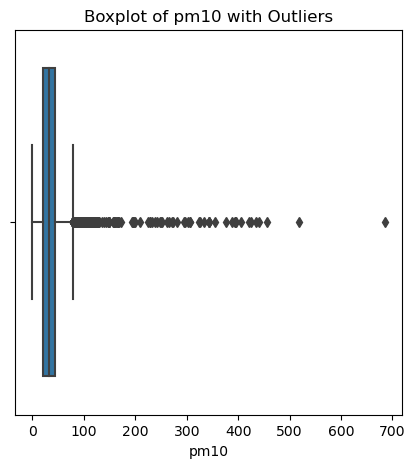

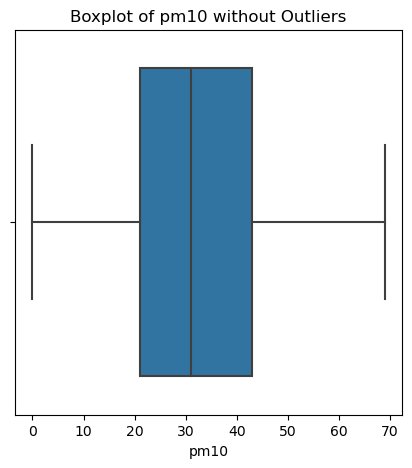

Shape of data without outliers: (32798, 6)


In [14]:
Q1 = x['pm10'].quantile(q=0.25)
Q3 = x['pm10'].quantile(q=0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

# Boxplot before removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['pm10'])
plt.title('Boxplot of pm10 with Outliers')
plt.show()

# Remove outliers pm10
outliers = x[(x['pm10'] < lower_bound) | (x['pm10'] > upper_bound)]
x = x[(x['pm10'] >= lower_bound) & (x['pm10'] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['pm10'])
plt.title('Boxplot of pm10 without Outliers')
plt.show()

print("Shape of data without outliers:", x.shape)


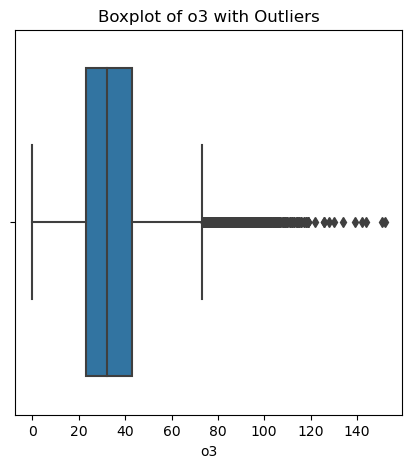

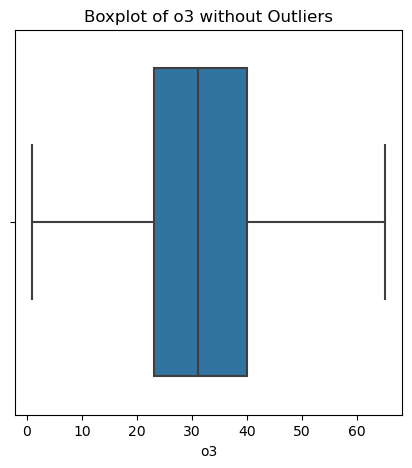

Shape of data without outliers: (30639, 6)


In [15]:
Q1 = x['o3'].quantile(q=0.25)
Q3 = x['o3'].quantile(q=0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

# Boxplot before removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['o3'])
plt.title('Boxplot of o3 with Outliers')
plt.show()

# Remove outliers o3
outliers = x[(x['o3'] < lower_bound) | (x['o3'] > upper_bound)]
x = x[(x['o3'] >= lower_bound) & (x['o3'] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['o3'])
plt.title('Boxplot of o3 without Outliers')
plt.show()

print("Shape of data without outliers:", x.shape)

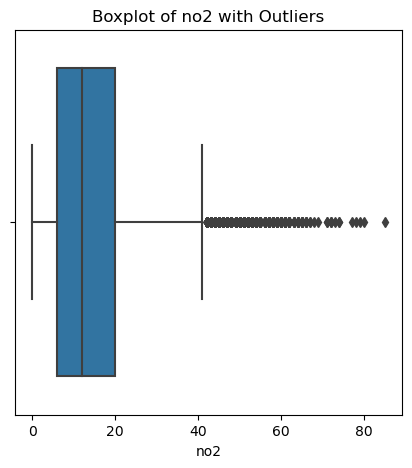

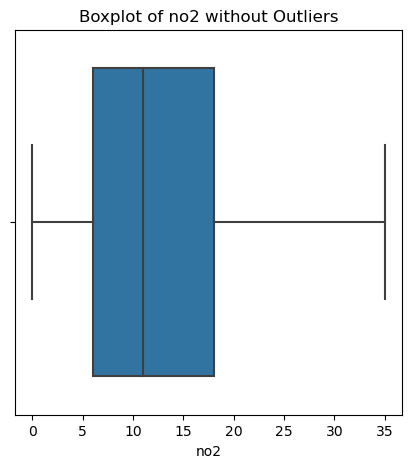

Shape of data without outliers: (28817, 6)


In [16]:
Q1 = x['no2'].quantile(q=0.25)
Q3 = x['no2'].quantile(q=0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

# Boxplot before removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['no2'])
plt.title('Boxplot of no2 with Outliers')
plt.show()

# Remove outliers no2
outliers = x[(x['no2'] < lower_bound) | (x['no2'] > upper_bound)]
x = x[(x['no2'] >= lower_bound) & (x['no2'] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['no2'])
plt.title('Boxplot of no2 without Outliers')
plt.show()

print("Shape of data without outliers:", x.shape)

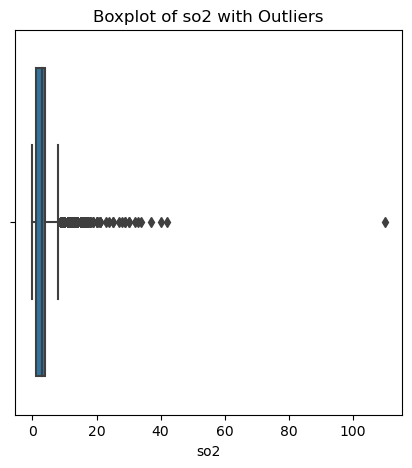

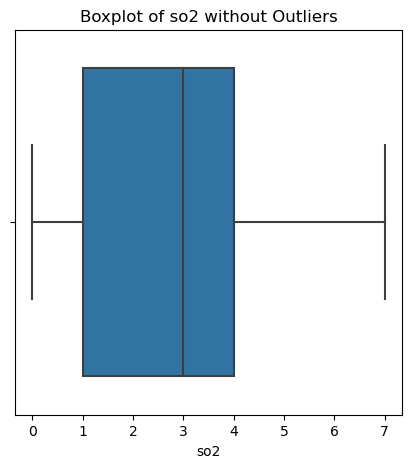

Shape of data without outliers: (26903, 6)


In [17]:
Q1 = x['so2'].quantile(q=0.25)
Q3 = x['so2'].quantile(q=0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

# Boxplot before removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['so2'])
plt.title('Boxplot of so2 with Outliers')
plt.show()

# Remove outliers so2
outliers = x[(x['so2'] < lower_bound) | (x['so2'] > upper_bound)]
x = x[(x['so2'] >= lower_bound) & (x['so2'] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['so2'])
plt.title('Boxplot of so2 without Outliers')
plt.show()

print("Shape of data without outliers:", x.shape)

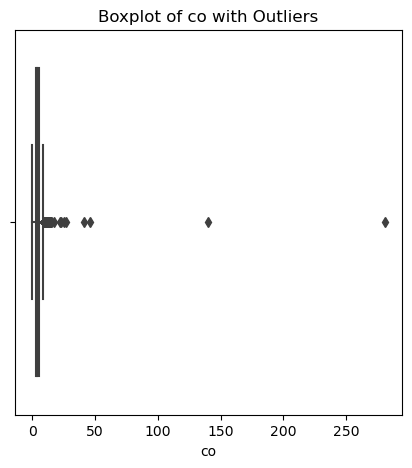

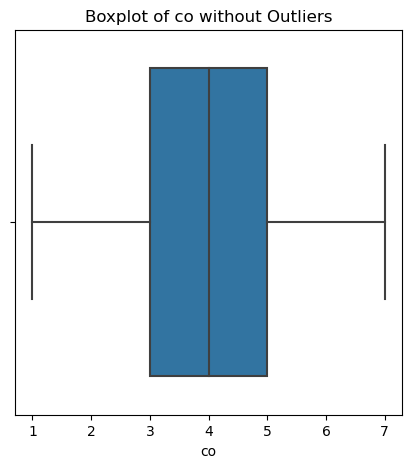

Shape of data without outliers: (24699, 6)


In [18]:
Q1 = x['co'].quantile(q=0.25)
Q3 = x['co'].quantile(q=0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

# Boxplot before removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['co'])
plt.title('Boxplot of co with Outliers')
plt.show()

# Remove outliers co
outliers = x[(x['co'] < lower_bound) | (x['co'] > upper_bound)]
x = x[(x['co'] >= lower_bound) & (x['co'] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=x['co'])
plt.title('Boxplot of co without Outliers')
plt.show()

print("Shape of data without outliers:", x.shape)

<Axes: >

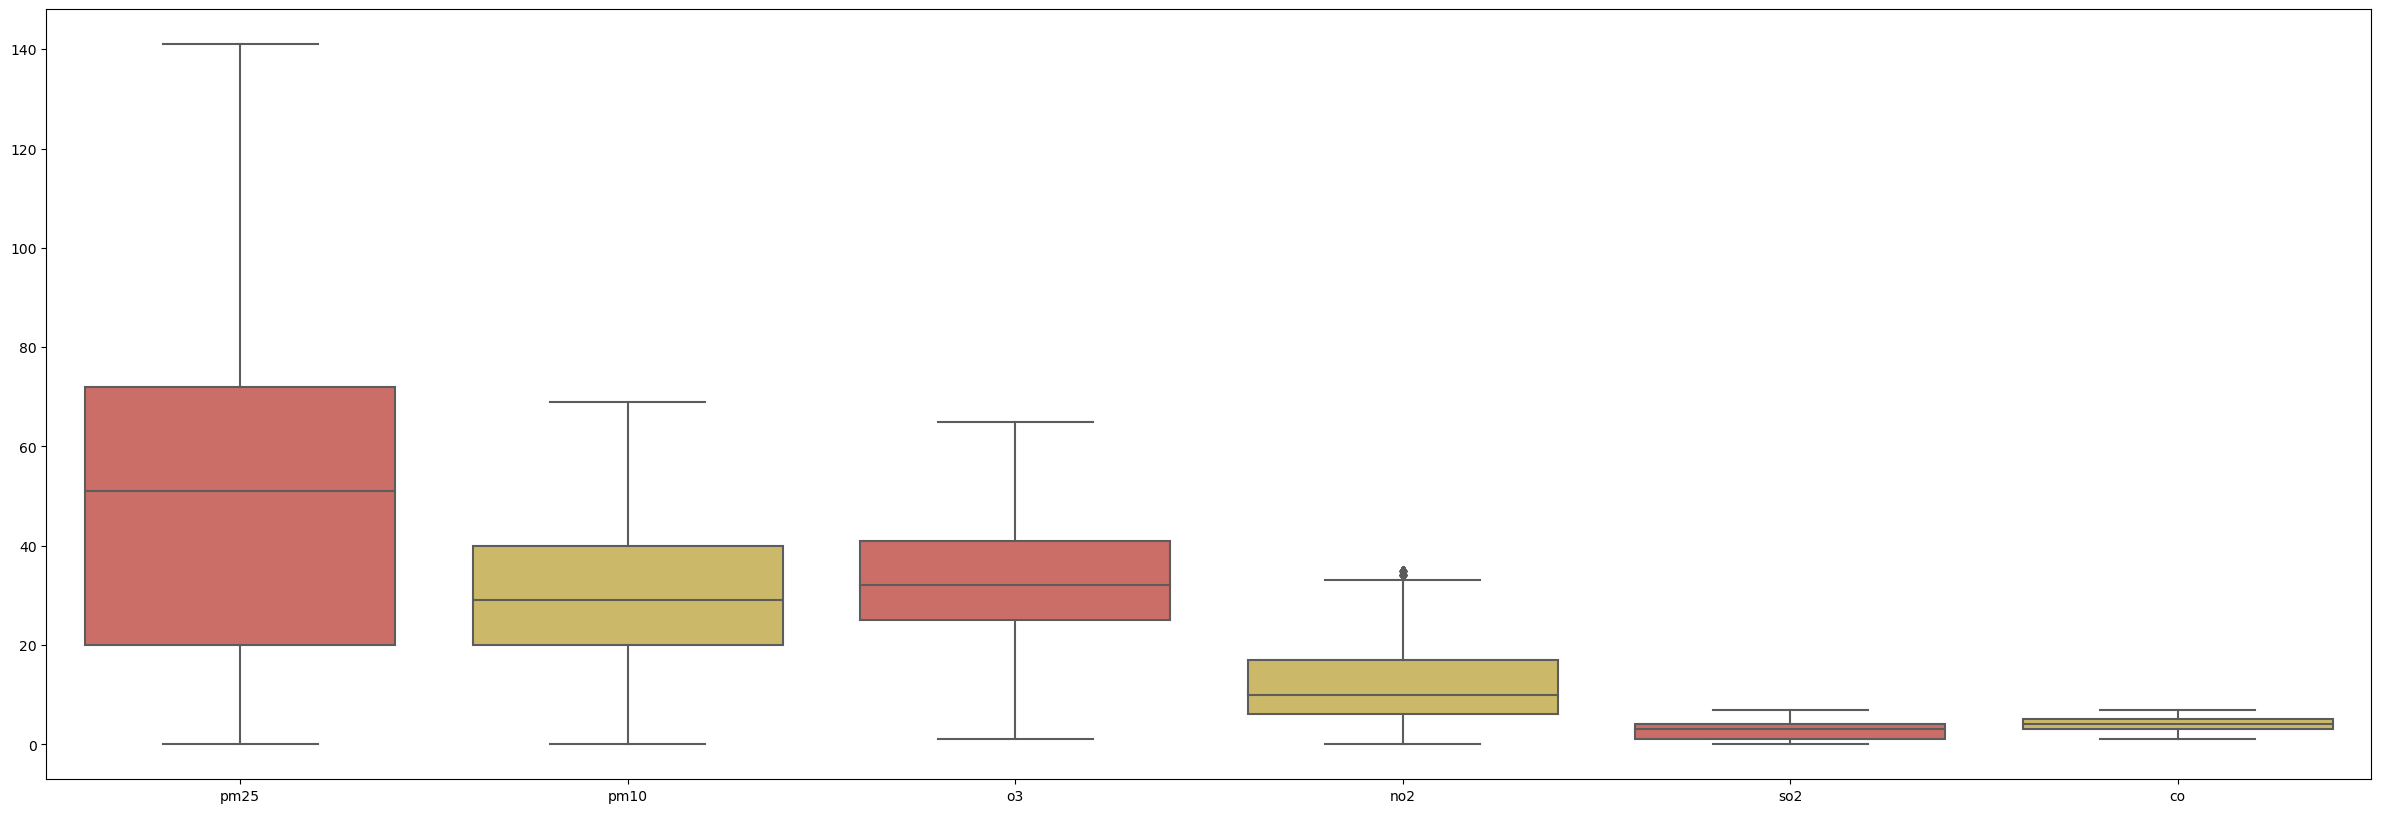

In [19]:
# Visualize All Numerical Variables after Removing Outliers using Boxplot
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=x, palette=('#db5f57','#dbc257'))

array([[<Axes: title={'center': 'pm25'}>,
        <Axes: title={'center': 'pm10'}>],
       [<Axes: title={'center': 'o3'}>, <Axes: title={'center': 'no2'}>],
       [<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'co'}>]],
      dtype=object)

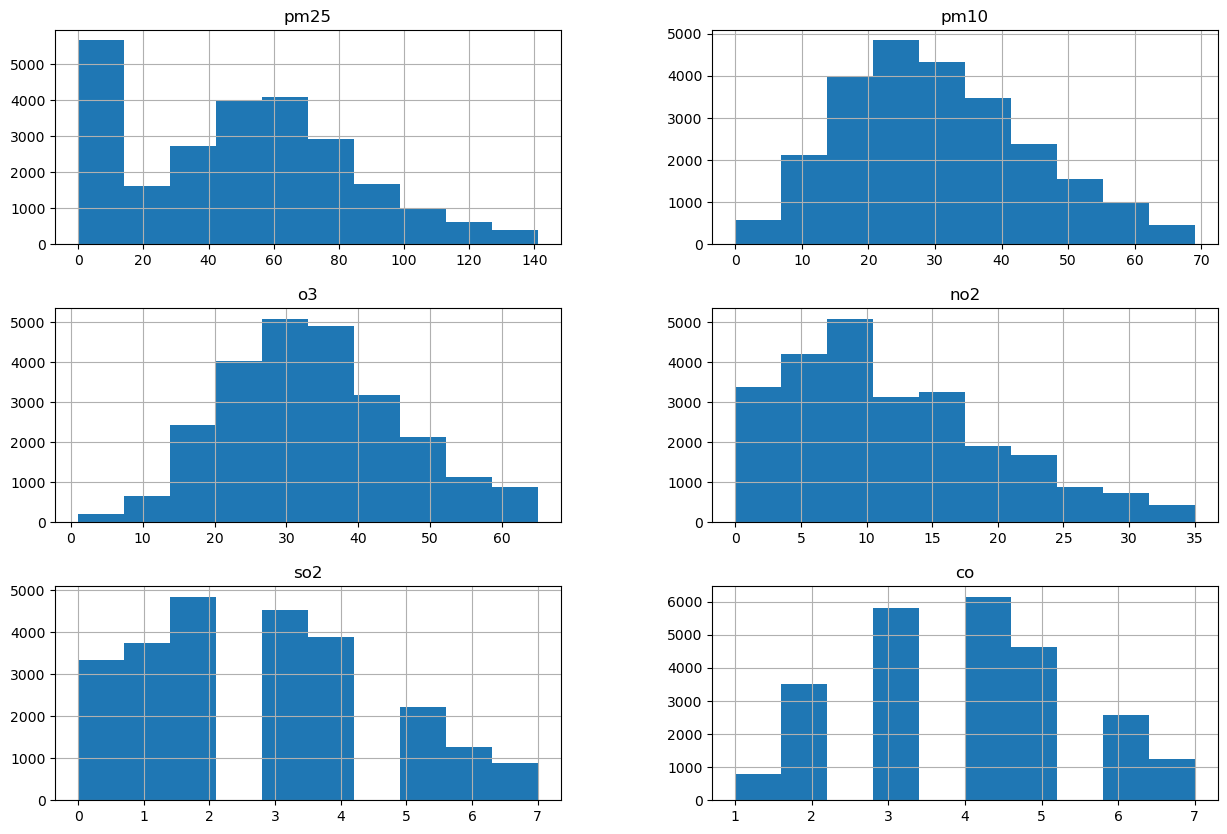

In [20]:
# Histogram Plot
plt.rcParams['figure.figsize'] = (15,10)
x.hist()

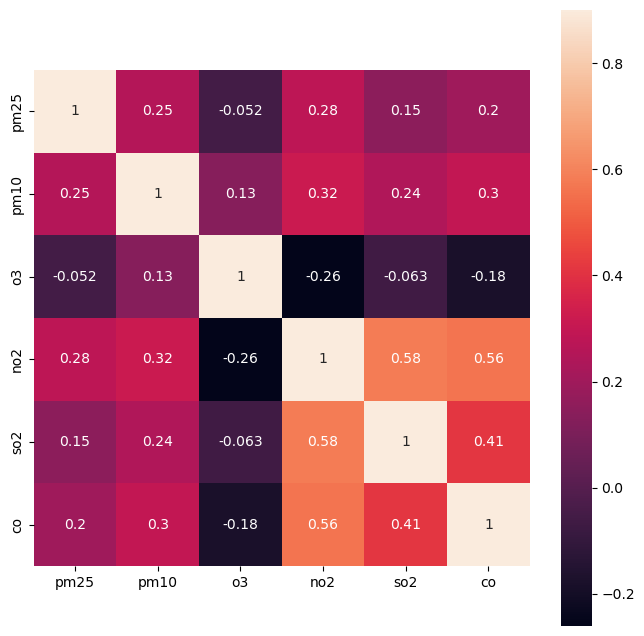

In [21]:
# Correlation Heatmap
corr = X.corr(method='pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(8,8)
sns.heatmap(corr, vmax=0.9, square=True, annot=True)
plt.show()

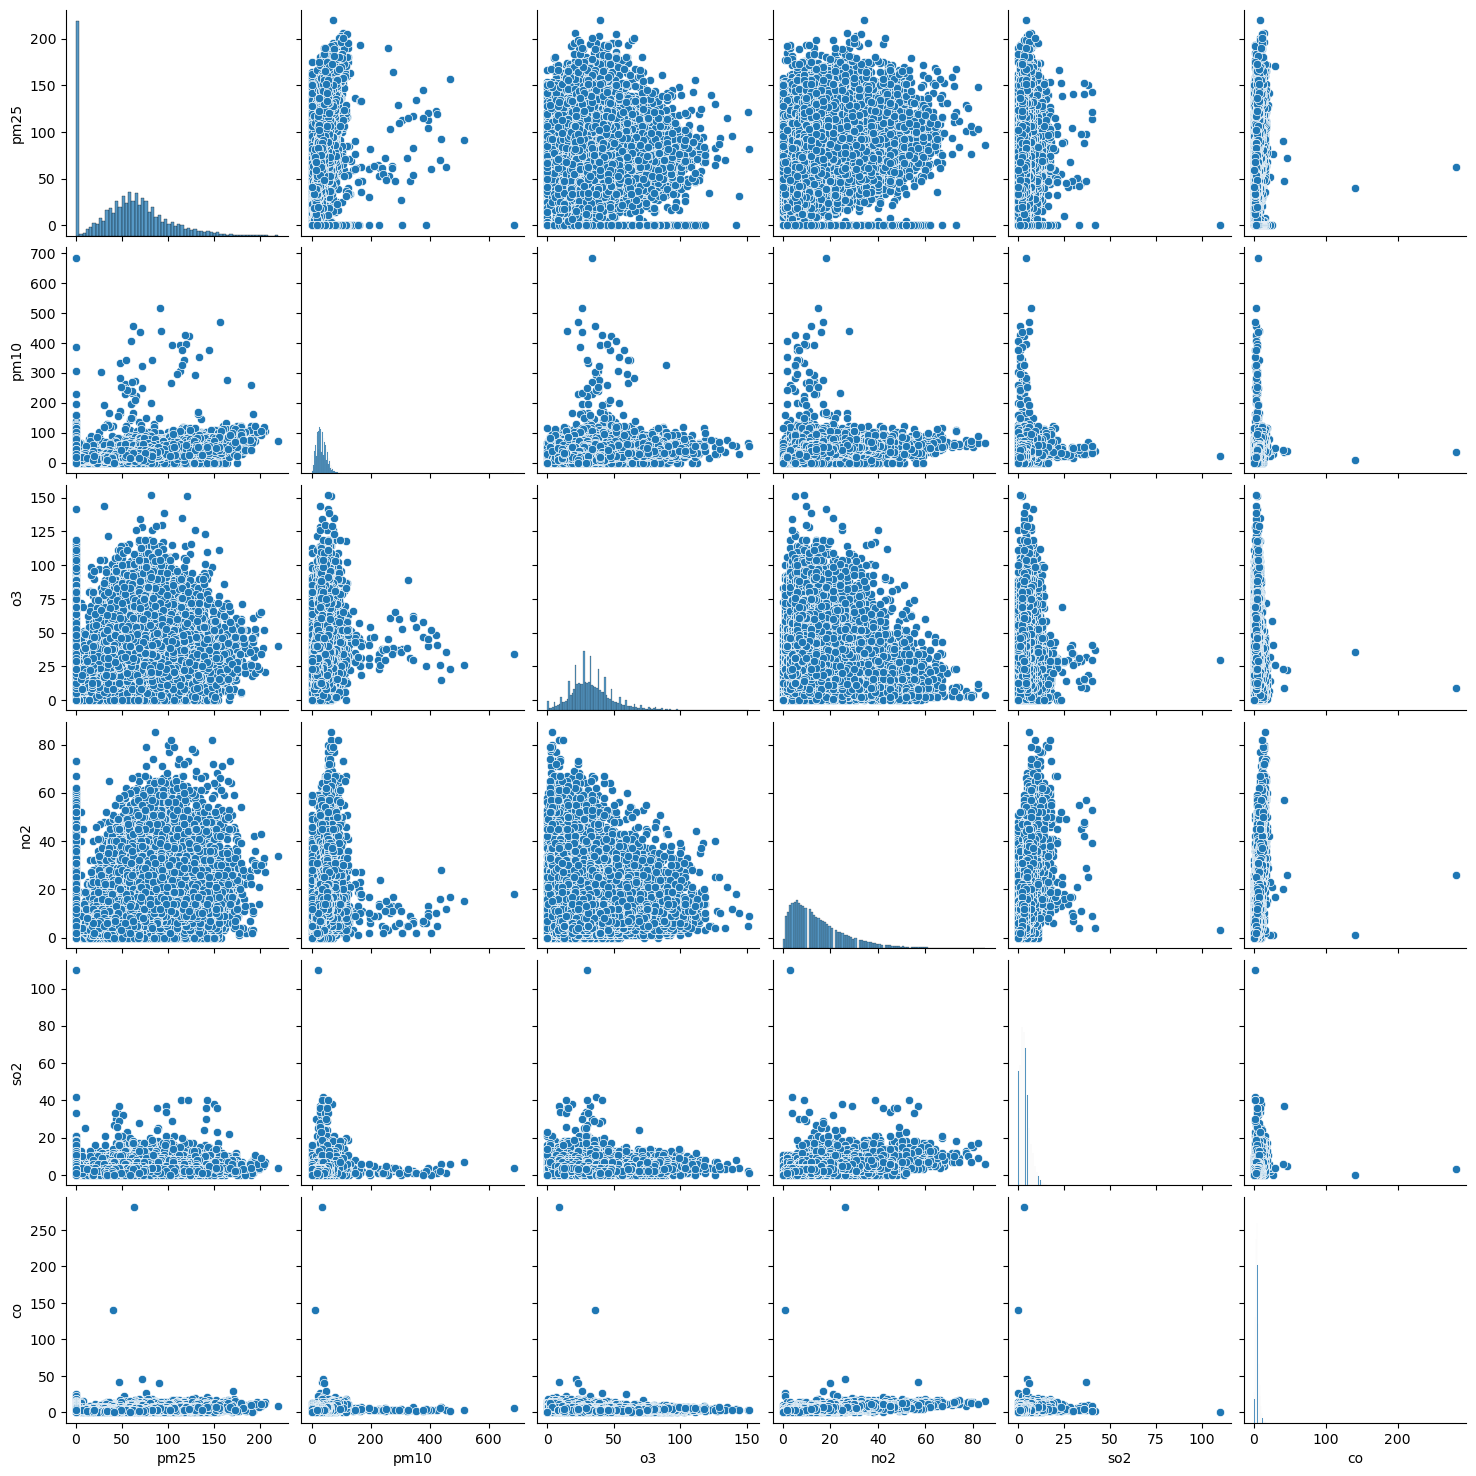

In [22]:
# Pairplot for Correlation
sns.pairplot(X)

## K-Means Modelling

Optimal number of clusters (Silhouette Score): 2


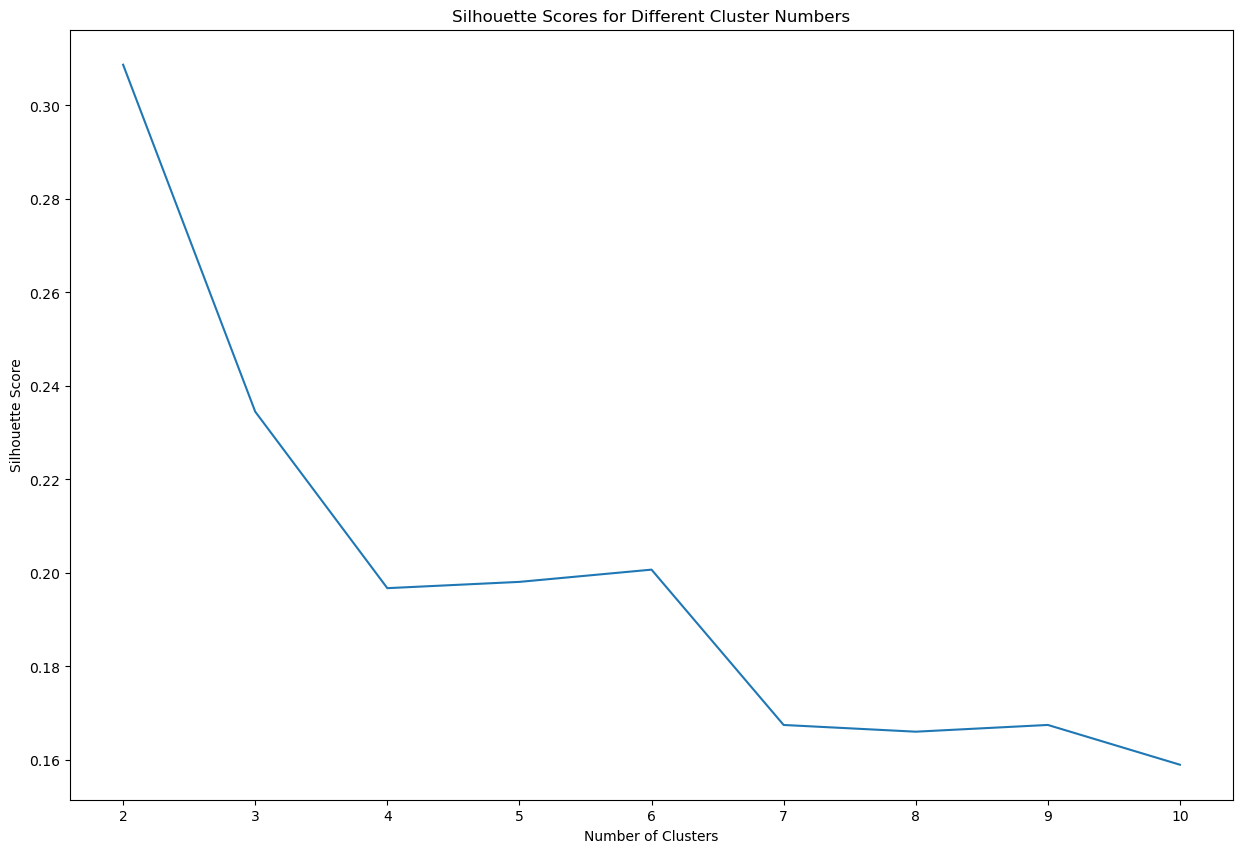

In [23]:
# Evaluate Silhouette Scores for Different Cluster Numbers
silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the number of clusters with the best Silhouette Score
best_clusters = np.argmax(silhouette_scores) + 2  # Add 2 to account for starting at 2
print("Optimal number of clusters (Silhouette Score):", best_clusters)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [24]:
# K-Means Clustering
kmeans = KMeans(n_clusters=best_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [25]:
# Examine the characteristics of each cluster
clusters = df.groupby('cluster')[features].mean()
clusters

,pm25,pm10,o3,no2,so2,co
cluster,,,,,,
0,76.431790,47.819374,27.776595,27.610609,6.171594,6.927560
1,43.057765,29.035109,37.454625,9.190829,2.405939,3.506143


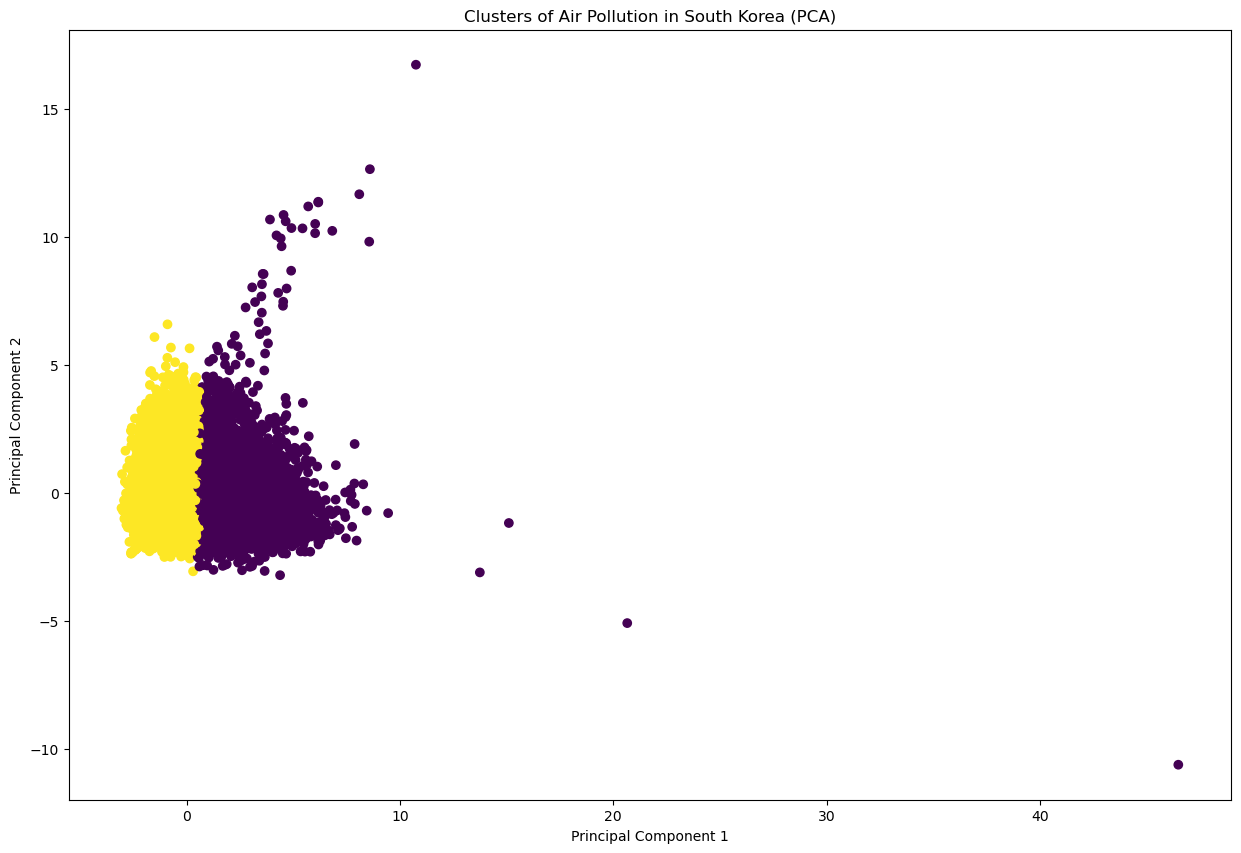

In [26]:
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['cluster'] = df['cluster']

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
            c=principalDf['cluster'], cmap='viridis')
plt.title('Clusters of Air Pollution in South Korea (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [27]:
# Create a dictionary to map cluster numbers to labels
cluster_labels = {
    0: 'High',
    1: 'Low',
}

# Add cluster labels to original dataframe
df['pollution_level'] = df['cluster'].map(cluster_labels)
df.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,Lat,Long,City,District,Country,cluster,pollution_level
0,0,2022/2/1,112,31,35,2,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,1,Low
1,1,2022/2/2,92,21,35,2,1,0,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,1,Low
2,2,2022/2/3,60,20,35,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,1,Low
3,3,2022/2/4,51,27,33,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,1,Low
4,4,2022/2/5,57,24,27,2,1,5,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,1,Low


In [28]:
df['pollution_level'].value_counts()

Low     24011
High    10519
Name: pollution_level, dtype: int64

## K-Means Evaluation

In [29]:
# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['pollution_level'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.30871248306260723


In [30]:
# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, df['pollution_level'])
print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 1.4221567442473262


In [31]:
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, df['pollution_level'])
print("Calinski-Harabasz Index:", calinski_harabasz)

Calinski-Harabasz Index: 12040.730427930223


## Agglomerative Clustering Modelling

In [32]:
# Normalize Data
X_scaledDendrogram = normalize(X)
X_scaledDendrogram = pd.DataFrame(X_scaledDendrogram, columns=X.columns)
X_scaledDendrogram.head()

,pm25,pm10,o3,no2,so2,co
0,0.922162,0.255241,0.288176,0.016467,0.008234,0.032934
1,0.913852,0.208597,0.347661,0.019866,0.009933,0.000000
2,0.828631,0.276210,0.483368,0.013811,0.013811,0.055242
3,0.765641,0.405340,0.495415,0.015013,0.015013,0.060050
4,0.841885,0.354478,0.398787,0.029540,0.014770,0.073850


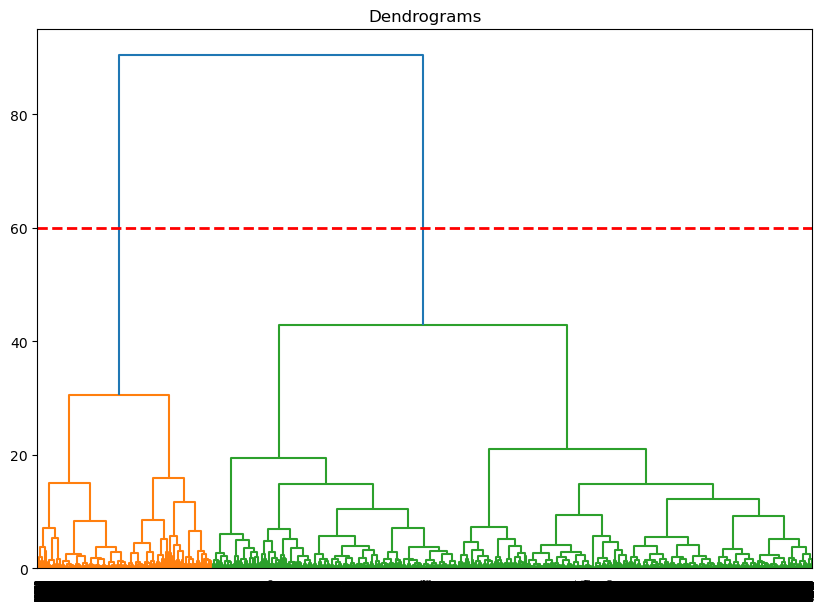

In [33]:
# Draw Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_scaledDendrogram, method='ward'))
plt.axhline(y=60, color='r', linestyle='--', linewidth=2)
plt.show()

In [34]:
# Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
df1['cluster'] = cluster.fit_predict(X_scaledDendrogram)

In [35]:
# Examine the characteristics of each cluster
clusters = df1.groupby('cluster')[features].mean()
clusters

,pm25,pm10,o3,no2,so2,co
cluster,,,,,,
0,68.557467,33.292516,33.767850,15.359277,3.590493,4.575008
1,0.619145,39.783395,37.040164,12.890543,3.424740,4.457205


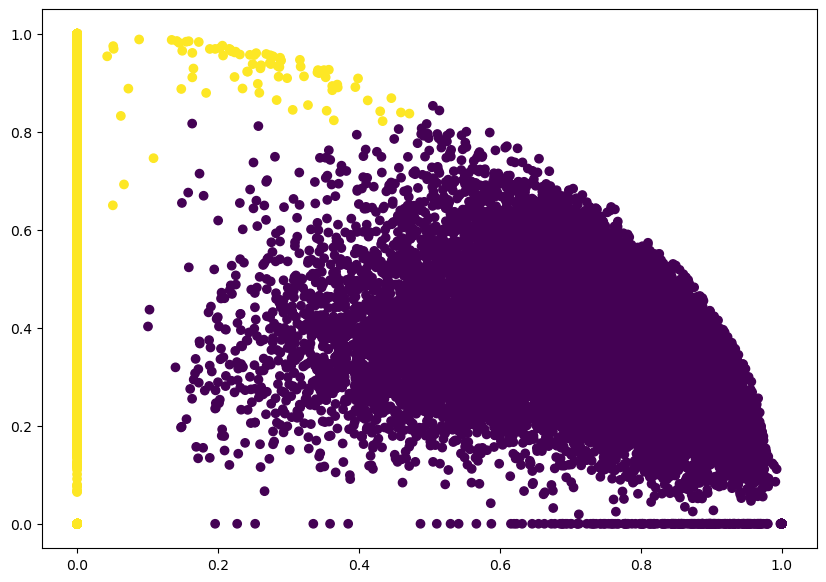

In [36]:
# Visualize Clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaledDendrogram['pm25'],
            X_scaledDendrogram['pm10'], c=cluster.labels_)

In [37]:
# Create a dictionary to map cluster numbers to labels
cluster_labels = {
    0: 'High',
    1: 'Low',
}

# Add cluster labels to original dataframe
df1['pollution_level'] = df1['cluster'].map(cluster_labels)
df1.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,Lat,Long,City,District,Country,cluster,pollution_level
0,0,2022/2/1,112,31,35,2,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,0,High
1,1,2022/2/2,92,21,35,2,1,0,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,0,High
2,2,2022/2/3,60,20,35,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,0,High
3,3,2022/2/4,51,27,33,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,0,High
4,4,2022/2/5,57,24,27,2,1,5,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea,0,High


In [38]:
df1['pollution_level'].value_counts()

High    26737
Low      7793
Name: pollution_level, dtype: int64

## Agglomerative Clustering Evaluation

In [39]:
# Silhouette Score
silhouette_avg = silhouette_score(X_scaledDendrogram, df1['pollution_level'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.558493111329283


In [40]:
# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaledDendrogram, df1['pollution_level'])
print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 0.7353681566051855


In [41]:
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaledDendrogram, df1['pollution_level'])
print("Calinski-Harabasz Index:", calinski_harabasz)

Calinski-Harabasz Index: 40242.39735725975


---

## Analysis of South Korean Air Pollution Clustering Results

The clustering analysis aimed to group regions in South Korea based on their air pollution profiles. The resulting clusters reveal distinct patterns in pollutant levels:


**Cluster Characteristics:**

- **High Pollution Cluster (Cluster 0):** This cluster exhibits the highest average levels across most pollutants. This suggests regions in this cluster face significant challenges related to particulate matter and gaseous pollutants.

- **Low Pollution Cluster (Cluster 1):** This cluster demonstrates the lowest average levels for all pollutants, indicating better air quality compared to the other clusters.
---

**Cluster Prevalence (using K-Means Clustering):**

- The "Low" pollution cluster is the most prevalent, encompassing 24,011 data points. This suggests a significant portion of South Korea experiences relatively good air quality.
- However, a considerable number of regions fall into the "High" (10,519) pollution cluster, highlighting the need for targeted interventions.

**Cluster Prevalence (using Agglomerative Clustering):**

- The “High” pollution cluster is the most common, covering 26737 data points. This shows that most areas of South Korea have relatively good air quality.
- However, a considerable number of regions fall into the "Low" (7793) pollution cluster, highlighting the need for targeted interventions.
---

**Evaluation (using K-Means Clustering):**

- **Silhouette Score (0.3087):**  This score can be considered as fair, suggests some clustering structure exists, but clusters might overlap or be loosely defined.
- **Davies-Bouldin Index (1.422):**  This relatively high value indicates potential overlap between clusters, reinforcing the observations from the Silhouette score.
- **Calinski-Harabasz Index (12040.7304):** The very high value suggests dense and well-separated clusters. This apparent contradiction with the other metrics could indicate the presence of a few dominant, well-defined clusters alongside smaller, less distinct clusters.

**Evaluation (using Agglomerative Clustering):**

- **Silhouette Score (0.5584):**  This score can be considered as fair, suggests some clustering structure exists, but clusters might overlap or be loosely defined.
- **Davies-Bouldin Index (0.7353):**  This indicates that the resulting clusters have a reasonable degree of separation and a fairly good level of uniformity.
- **Calinski-Harabasz Index (40242.3):** shows that the resulting clusters are quite good at separating data into compact and separate clusters.
---
**Overall Interpretation:**

The clustering reveals distinct pollution profiles across South Korea. While many regions enjoy good air quality, substantial areas experience elevated levels of various pollutants. The evaluation metrics suggest the clustering captures some underlying structure but also reveals potential overlap and variations in cluster definition. Further exploration with different clustering algorithms and careful visual inspection of the clusters is recommended to refine the analysis.

Based on a comparison of the evaluation results on K-Means Clustering with Agglomerative Clustering, it shows that, Agglomerative Clustering shows better quality in cluster separation, with a Silhouette Score of 0.5585, which is higher than K-Means Clustering which only reaches 0.3087. In addition, the lower Davies-Bouldin Index value for Agglomerative Clustering (0.7354) indicates the clusters are more homogeneous and well separated compared to K-Means Clustering (1.4222). This is reinforced by the higher Calinski-Harabasz Index value for Agglomerative Clustering (40242.3974), indicating the clusters are denser and clearly separated compared to K-Means Clustering (12040.7304). So, Agglomerative Clustering provides better results in terms of separation and cohesion of clusters compared to K-Means Clustering.



---